# Handy small functions related to astronomical research

In [1]:
import math
import numpy as np
from numpy import size

## Defining function
### Emission related
#### 1. Dust

In [2]:
def Planckfunc_cgs(freq, temperature):
  """
  Calculate Planck function.
  
  Inputs:
     freq: frequency, in Hz
     temperature: temperature in Kelvin
     
  Return:
     Intensity: in cgs unit ( erg s^-1 sr^-1 cm^-2 Hz-1 )
  """

  # defining physical constants
  c_cgs       = 29979245800.0   # light speed
  h_cgs       = 6.62606885e-27  # planck constant
  kB_cgs      = 1.38064852e-16  # Boltzmann constant

  inputsize = size(freq)
    
  if (inputsize ==1):
    A = ( 2.0 * h_cgs * (freq**3.0) ) /  ( c_cgs ** 2.0 )
    B = math.exp( (h_cgs * freq) / (kB_cgs * temperature) )
    return A * ( 1.0 / (B - 1.0) )

  else:
     out_array = np.arange(0, inputsize) * 0.0
    
     for id in list(range(0,inputsize)):
       A = ( 2.0 * h_cgs * (freq[id]**3.0) ) /  ( c_cgs ** 2.0 )
       B = math.exp( (h_cgs * freq[id]) / (kB_cgs * temperature) )
       out_array[id] = A * ( 1.0 / (B - 1.0) )
     return out_array
    
    
    

def Planckfunc_mks(freq, temperature):
  """
  Calculate Planck function.
  
  Inputs:
     freq: frequency, in Hz
     temperature: temperature in Kelvin
     
  Return:
     Intensity: in mks unit ( J s^-1 sr^-1 m^-2 Hz-1 )
  """

  # defining physical constants
  c_mks       = 299792458.0   # light speed
  h_mks       = 6.62607004e-34  # planck constant
  kB_mks      = 1.38064852e-23  # Boltzmann constant

  inputsize = size(freq)

  if (inputsize ==1):
    A = ( 2.0 * h_mks * (freq**3.0) ) /  ( c_mks ** 2.0 )
    B = math.exp( (h_mks * freq) / (kB_mks * temperature) )
    return A * ( 1.0 / (B - 1.0) )

  else:
    out_array = np.arange(0, inputsize) * 0.0
    
    for id in list(range(0,inputsize)):
      A = ( 2.0 * h_mks * (freq[id]**3.0) ) /  ( c_mks ** 2.0 )
      B = math.exp( (h_mks * freq[id]) / (kB_mks * temperature) )
  
    return out_array

#### 2. Opacity

In [3]:
# free-free emission
def emission_measure(ne, ell):
  """
  Estimate emission measure, in unit of pc cm^-6
  
  Inputs:
    ne:  election number volume-density, in unit of cm^-3
    ell: line-of-sight thickness of emission region, in unit of pc
  
  Return:
    emission measure (EM), in unit of pc cm^-6
  
  """

  emission_measure = math.pow( ne, 2.0 ) * ell

  return emission_measure
    
    
    
def tauff_Mezger67(freq, Te, EM):
  """
  Calculate electron optical depth for free-free emission.
  following the prescription of Mezger & Henderson (1967) and
  Keto et al. (2003).
  
  Inputs:
    freq: frequency / frequencies, in Hz
    Te  : electron temperature in Kelvin
    EM  : emission measure in pc cm^-6
  
  Return:
    optical depth (dimension free)
  """

  inputsize = size(freq)
    
  if (inputsize ==1):
    tauff = 8.235e-2 * math.pow( Te, -1.35 ) * math.pow( freq/1e9, -2.1 ) * EM
    return tauff
    
  else:
    out_array = np.arange(0, inputsize) * 0.0
    
    for id in list(range(0,inputsize)):
      out_array[id] = 8.235e-2 * \
                  math.pow( Te, -1.35 )* \
                  math.pow( freq[id]/1e9, -2.1 ) * \
                  EM

    return out_array
    
    
    
# Simplified dust
def dustkappa_cgs(freq, rep_freq, opacity_at_repfreq, opacity_index):
  """
  Calculate dust opacity at the specified frequency 
  
  
  Inputs:
    freq: frequency / frequencies, in Hz
    rep_freq: a frequency which the dust opacity is specified, in Hz
    opacity_at_repfreq: opacity at the specified representative frequency, in cm^2 g^-1
    opacity index: dust opacity spectral index (dimension free)
    
    
  Return:
    dust opacity, in units of cm^2 g^-1
  """

  inputsize = size(freq)

  if (inputsize ==1):
    opacity = opacity_at_repfreq * math.pow( (freq / rep_freq ) , opacity_index)
    return opacity
  else:
    out_array = np.arange(0, inputsize) * 0.0
    
    for id in list(range(0,inputsize)):
      out_array[id] = opacity_at_repfreq * math.pow( (freq[id] / rep_freq ) , opacity_index)
    
    return out_array




# Modified black body flux
def blackbody_Fnu_cgs(freq, temperature, tau, Omega):
  """
  Evaluate flux of black body emission, in cgs unit.
  
  Inputs:
    Frequency : frequency / frequencies, in Hz
    temperature : temperature, in Kelvin
    tau       : optical depth /depths, dimensionless
    Omega     : solid angle, in Sr
    
  Return:
    flux in cgs unit
  """

  inputsize = size(freq)

  if (inputsize ==1):
    flux = Planckfunc_cgs(freq, temperature) * \
           (1.0 - math.exp(-1.0 * tau) )* \
           Omega
    
    return flux

  else:
    out_array = np.arange(0, inputsize) * 0.0
    
    for id in list(range(0,inputsize)):
      out_array[id] = Planckfunc_cgs(freq[id], temperature) * \
           (1.0 - math.exp(-1.0 * tau[id]) )* \
           Omega
            
    return out_array

In [4]:
print ('electron optical depth: ', tauff_Mezger67(33.0*1e9, 8000.0, 1.0e9), end='\n' )

print ('dust opacity: ', dustkappa_cgs(33.0*1e9, 230.0*1e9, 1.0 ,1.75), end='cm${^2}$ g$^{-1}$' )

electron optical depth:  0.28682225593299054
dust opacity:  0.03344842569134499cm${^2}$ g$^{-1}$

### Motions
#### 1. free-fall timescale

In [5]:
def freefall_cgs(density):
  """
  Calculate free-fall timescale.

  Input:
     density: density, in g cm^-3

  Return:
     Free fall time ( seconds )
  """

  # defining physical constants
  G_cgs       = 6.674e-8

  inputsize = size(density)

  if (inputsize ==1):
    A = 3.0 * math.pi
    B = 32.0 * G_cgs * density
    time = math.sqrt( A / B )
    
    return time

  else:
    out_array = np.arange(0, inputsize) * 0.0
    for id in list(range(0,inputsize)):
      A = 3.0 * math.pi
      B = 32.0 * G_cgs * density[id]
      out_array[id] = math.sqrt( A / B )
    
    return out_array

#### 2. Jeans Length and Jeans mass

In [6]:
def Jeanslength_cgs(density, temperature, particlemass):
  """
  Calculate Jeans Length.
  
  Inputs:
     density: density, in  g cm^-3
     temperature: temperature in Kelvin
     particlemass: in g, to be used for calculating sound speed
     
  Return:
     Jeans length in cgs unit ( cm )
  """

  # defining physical constants
  kB_cgs      = 1.38064852e-16  # Boltzmann constant
  G_cgs       = 6.674e-8


  inputsize = size(density)
  if (inputsize ==1):

    A = 15.0 * kB_cgs * temperature
    B = 4.0 * math.pi * G_cgs * density * particlemass
    length = math.sqrt( A / B )

    return length

  else:
    out_array = np.arange(0, inputsize) * 0.0
    for id in list(range(0,inputsize)):
      A = 15.0 * kB_cgs * temperature
      B = 4.0 * math.pi * G_cgs * density[id] * particlemass
      length = math.sqrt( A / B )
      out_array[id] = length
        
    return out_array


def Jeansmass_cgs(density, temperature, particlemass):
  """
  Calculate Jeans mass.
  
  Inputs:
     density: density, in  g cm^-3
     temperature: temperature in Kelvin
     particlemass: in g, to be used for calculating sound speed
     
  Return:
     Jeans mass in cgs unit ( g )
  """

  inputsize = size(density)
  if (inputsize ==1):
    
    mass = (4.0 / 3.0) * math.pi  \
         * ( Jeanslength_cgs(density, temperature, particlemass) **3 ) \
         * density
        
    return mass

  else:
    out_array = np.arange(0, inputsize) * 0.0
    for id in list(range(0,inputsize)):
      out_array[id] = (4.0 / 3.0) * math.pi  \
         * ( Jeanslength_cgs(density[id], temperature, particlemass) **3 ) \
         * density[id]
        
    return out_array


#### 3. Toomore Q parameter

### Observatory related
#### Target source availability

### Frequently used unit/coordinate transformation
#### Brightness tempreature

## Plotting

In [7]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Plot Planck function in cgs and mks unit

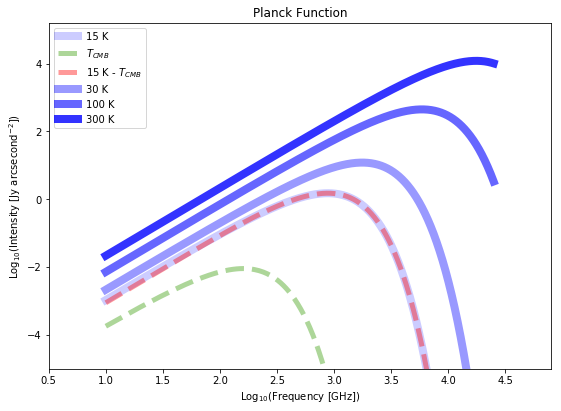

In [8]:
freq_array   = np.arange(1, 2501) * 1e10  # frequency in Hz
output_array_mks = np.arange(1, 2501) * 0.0

# physical constants
cgsflux_to_Jy = 1e23
mksflux_to_Jy = 1e26

str_to_sqdegree    = 3282.80635
str_to_sqarcsecond = 3282.80635 * (3600.0 ** 2.0)

# initializing plotting
fig = plt.figure(figsize=(9, 14))
plt.subplot(2, 1, 1)
plt.axis([0.5, 4.9, -5, 5.2])

# plt.axis([2.0, 3.0, -1, 1])

# evaluate Planck function in CGS unit
temperature  = 15.0                  # Kelvin
output_array_cgs = Planckfunc_cgs(freq_array, temperature) \
                   * cgsflux_to_Jy / str_to_sqarcsecond
    
plt.plot(np.log10( freq_array / 1e9) , np.log10(output_array_cgs), \
         color = (0, 0, 1.0, 0.2),
         linewidth=8, label = '15 K')
    
# evaluate Planck function in MKS unit
TCMB  = 2.72548                  # Kelvin

for id in list(range(0, 2500)):
  
  output_array_mks[id] = Planckfunc_mks(freq_array[id], TCMB) * \
                                  mksflux_to_Jy / str_to_sqarcsecond

plt.plot(np.log10( freq_array / 1e9), np.log10(output_array_mks), \
          linestyle = 'dashed',
          color = (0.2, 0.6, 0, 0.4),
          linewidth =5, label = '$T_{CMB}$')
plt.plot(np.log10( freq_array / 1e9), np.log10(output_array_cgs - output_array_mks), \
          linestyle = 'dashed',
          color = (1.0, 0, 0, 0.4),
          linewidth =5, label = '15 K - $T_{CMB}$')    
    


    
# evaluate Planck function in CGS unit
temperature  = 30.0                  # Kelvin
output_array_cgs = Planckfunc_cgs(freq_array, temperature) \
                   * cgsflux_to_Jy / str_to_sqarcsecond
    
plt.plot(np.log10( freq_array / 1e9) , np.log10(output_array_cgs), \
         color = (0, 0, 1.0, 0.4),
         linewidth=8, label = '30 K')    


# evaluate Planck function in CGS unit
temperature  = 100.0                  # Kelvin
output_array_cgs = Planckfunc_cgs(freq_array, temperature) \
                   * cgsflux_to_Jy / str_to_sqarcsecond

plt.plot(np.log10( freq_array / 1e9) , np.log10(output_array_cgs), \
         color = (0, 0, 1.0, 0.6),
         linewidth=8, label = '100 K')    


# evaluate Planck function in CGS unit
temperature  = 300.0                  # Kelvin
output_array_cgs = Planckfunc_cgs(freq_array, temperature) \
                   * cgsflux_to_Jy / str_to_sqarcsecond

plt.plot(np.log10( freq_array / 1e9) , np.log10(output_array_cgs), \
         color = (0, 0, 1.0, 0.8),
         linewidth=8, label = '300 K')    




plt.title('Planck Function')
plt.xlabel('Log$_{10}$(Frequency [GHz])')
plt.ylabel('Log$_{10}$(Intensity [Jy arcsecond$^{-2}$])')
plt.legend(loc=2)

### Plot electron (free-free) optical depth as a function of emission measure

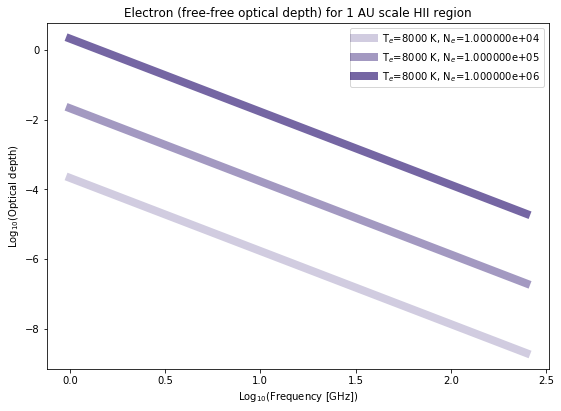

In [9]:
# initializing arrays
freq   = np.arange(1, 250) * 1e9  # frequency in Hz  # Hz

# initial condition
ell = 1.0 / 2.0626e5  # parsec


# initializing plotting
fig = plt.figure(figsize=(9, 14))
plt.subplot(2, 1, 1)

# evaluate electron (free-free) optical depth
Te  = 8000.0 # Kelvin
ne  = 1e4        # cm^-3
EM  = emission_measure( ne, ell )
output_array = tauff_Mezger67(freq, Te, EM)
label = 'T$_{e}$=8000 K, N$_{e}$=%e' % ( round(ne,0) )
plt.plot(np.log10( freq / 1e9 ), np.log10(output_array), \
         color = (0.1, 0.0, 0.4, 0.2),
         linewidth=8, label = label)

Te  = 8000.0 # Kelvin
ne  = 1e5        # cm^-3
EM  = emission_measure( ne, ell )
output_array = tauff_Mezger67(freq, Te, EM)
label = 'T$_{e}$=8000 K, N$_{e}$=%e' % ( round(ne,0) )
plt.plot(np.log10( freq / 1e9 ), np.log10(output_array), \
         color = (0.1, 0.0, 0.4, 0.4),
         linewidth=8, label = label)

Te  = 8000.0 # Kelvin
ne  = 1e6       # cm^-3
EM  = emission_measure( ne, ell )
output_array = tauff_Mezger67(freq, Te, EM)
label = 'T$_{e}$=8000 K, N$_{e}$=%e' % ( round(ne,0) )
plt.plot(np.log10( freq / 1e9 ), np.log10(output_array), \
         color = (0.1, 0.0, 0.4, 0.6),
         linewidth=8, label = label)


plt.title('Electron (free-free optical depth) for 1 AU scale HII region')
plt.xlabel('Log$_{10}$(Frequency [GHz])')
plt.ylabel('Log$_{10}$(Optical depth)')
plt.legend(loc=1)

#### Plotting the measurements for FU Ori as an practical example. Reference see Liu, H. B. et al. (2017) [arXiv:1701.06531]

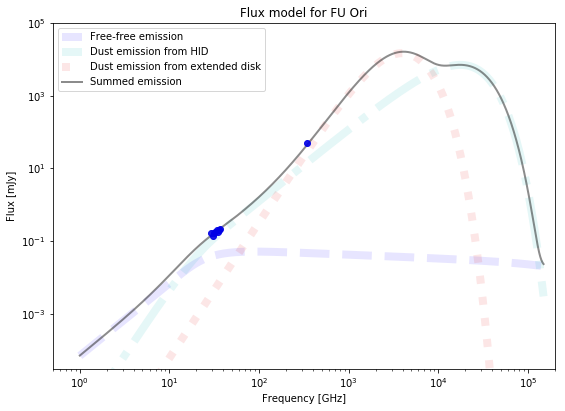

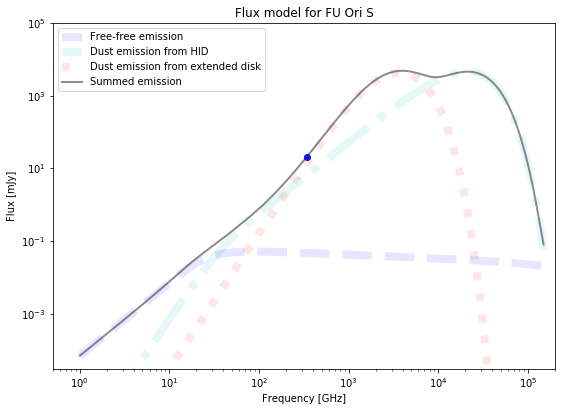

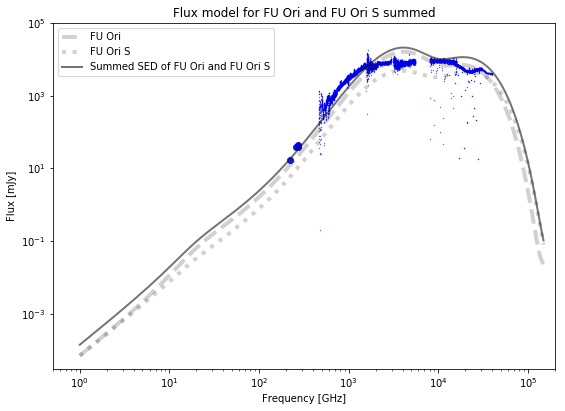

In [38]:
# initializing arrays
freq1   = np.arange(1, 50000) * 1e9  # frequency in Hz  # Hz
freq2   = np.arange(50000, 150000, 1000) * 1e9
freq    = np.concatenate((freq1, freq2), axis=0)

# physical constants
c_mks = 299792458.0 # light speed in m/s
cgsflux_to_Jy = 1e23

# initializing plotting
fig = plt.figure(figsize=(9, 14))
plt.subplot(2, 1, 1)
plt.axis([0.5, 2e5, 3e-5, 1e5])
plt.xscale('log')
plt.yscale('log')


# FU Ori
Te_FUOri  = 16000.0 # Kelvin
EM_FUOri  = 6.98e9
Omega_ff_FUOri = 1.41e-16  # solid angle
FUOri_ff_flux = blackbody_Fnu_cgs(freq, Te_FUOri, tauff_Mezger67(freq, Te_FUOri, EM_FUOri), Omega_ff_FUOri)

plt.plot( ( freq / 1e9 ), (FUOri_ff_flux * cgsflux_to_Jy * 1e3), \
          color = (0.1, 0.0, 1, 0.1),
          linestyle = 'dashed', 
          linewidth=8, label = 'Free-free emission')

T_HID_FUOri = 300.0
kappa230Sigma_FUOri = 103.0
Omega_HID_FUOri = 1.38e-14
betaHID_FUOri   = 1.75  # dust opacity spectral index
tauHID_FUOri = dustkappa_cgs(freq, 230.0e9, kappa230Sigma_FUOri, betaHID_FUOri)
FUOri_HID_flux = blackbody_Fnu_cgs(freq, T_HID_FUOri, \
                        tauHID_FUOri, Omega_HID_FUOri)

plt.plot( ( freq / 1e9 ), (FUOri_HID_flux * cgsflux_to_Jy * 1e3), \
          color = (0, 0.7, 0.7, 0.1),
          linestyle = 'dashdot', 
          linewidth=8, label = 'Dust emission from HID')

T_disk_FUOri = 60.0  # far IR temperature is like ~30 K
kappa230Sigma_FUOri = 2.06e-2
Omega_disk_FUOri = 3.88e-12
betadisk_FUOri   = 1.75  # dust opacity spectral index
taudisk_FUOri = dustkappa_cgs(freq, 230.0e9, kappa230Sigma_FUOri, betadisk_FUOri)
FUOri_disk_flux = blackbody_Fnu_cgs(freq, T_disk_FUOri, \
                        taudisk_FUOri, Omega_disk_FUOri)

plt.plot( ( freq / 1e9 ), (FUOri_disk_flux * cgsflux_to_Jy * 1e3), \
          color = (0.9, 0.05, 0.05, 0.1),
          linestyle = 'dotted', 
          linewidth=8, label = 'Dust emission from extended disk')

# plot summed model
plt.plot( ( freq / 1e9 ), \
          ( (FUOri_disk_flux + FUOri_HID_flux + FUOri_ff_flux) * cgsflux_to_Jy * 1e3), \
          color = (0.1, 0.1, 0.1, 0.5), 
          linewidth=2, label = 'Summed emission')

# plot observed data
fuori_jvla_freq = np.array([33.48707, 34.51107, 35.48707, 36.51107, 29.42306, 30.51106, 31.48706, 32.51107])
fuori_jvla_freq = fuori_jvla_freq * 1e9
fuori_jvla_mJy  = np.array([205.0, 181.0, 199.0, 215.0, 167.0, 137.0, 165.0, 173.0]) * 1e-3
plt.plot( (fuori_jvla_freq / 1e9) , (fuori_jvla_mJy), 
                  'o',
                  color = (0, 0, 0.9, 0.9))

fuori_alma_freq = np.array([345.784])
fuori_alma_freq = fuori_alma_freq * 1e9
fuori_alma_mJy  = np.array([50.1])
plt.plot( (fuori_alma_freq / 1e9) , (fuori_alma_mJy), 
                  'o',
                  color = (0, 0, 0.9, 0.9))


plt.title('Flux model for FU Ori')
plt.xlabel('Frequency [GHz]')
plt.ylabel('Flux [mJy]')
plt.legend(loc=2)





# FU Ori S
Te_FUOriS  = 16000.0 # Kelvin
EM_FUOriS  = 4.85e9
Omega_ff_FUOriS = 1.94e-16  # solid angle


# initializing plotting
fig2 = plt.figure(figsize=(9, 14))
plt.subplot(2, 1, 2)
plt.axis([0.5, 2e5, 3e-5, 1e5])
plt.xscale('log')
plt.yscale('log')

FUOriS_ff_flux = blackbody_Fnu_cgs(freq, Te_FUOri, tauff_Mezger67(freq, Te_FUOri, EM_FUOri), Omega_ff_FUOri)

plt.plot( ( freq / 1e9 ),  (FUOriS_ff_flux * cgsflux_to_Jy * 1e3), \
          color = (0.1, 0.0, 1, 0.1),
          linestyle = 'dashed', 
          linewidth=8, label = 'Free-free emission')

T_HID_FUOriS = 360.0
kappa230Sigma_FUOriS = 32.0
Omega_HID_FUOriS = 5.19e-15
betaHID_FUOriS   = 1.75  # dust opacity spectral index
tauHID_FUOriS = dustkappa_cgs(freq, 230.0e9, kappa230Sigma_FUOriS, betaHID_FUOriS)
FUOriS_HID_flux = blackbody_Fnu_cgs(freq, T_HID_FUOriS, \
                        tauHID_FUOriS, Omega_HID_FUOriS)

plt.plot( ( freq / 1e9 ),  (FUOriS_HID_flux * cgsflux_to_Jy * 1e3), \
          color = (0, 0.7, 0.7, 0.1),
          linestyle = 'dashdot', 
          linewidth=8, label = 'Dust emission from HID')

T_disk_FUOriS = 60.0
kappa230Sigma_FUOriS = 3.87e-2
Omega_disk_FUOriS = 1.04e-12
betadisk_FUOriS   = 1.75  # dust opacity spectral index
taudisk_FUOriS = dustkappa_cgs(freq, 230.0e9, kappa230Sigma_FUOriS, betadisk_FUOriS)
FUOriS_disk_flux = blackbody_Fnu_cgs(freq, T_disk_FUOriS, \
                        taudisk_FUOriS, Omega_disk_FUOriS)

plt.plot( ( freq / 1e9 ),  (FUOriS_disk_flux * cgsflux_to_Jy * 1e3), \
          color = (0.9, 0.05, 0.05, 0.1),
          linestyle = 'dotted', 
          linewidth=8, label = 'Dust emission from extended disk')

# plot summed model
plt.plot( ( freq / 1e9 ), \
           ( (FUOriS_disk_flux + FUOriS_HID_flux + FUOriS_ff_flux) * cgsflux_to_Jy * 1e3), \
          color = (0.1, 0.1, 0.1, 0.5), 
          linewidth=2, label = 'Summed emission')

# plot observed data
fuoriS_jvla_freq = np.array([33.48707, 34.51107, 35.48707, 36.51107, 29.42306, 30.51106, 31.48706, 32.51107])
fuoriS_jvla_freq = fuoriS_jvla_freq * 1e9
fuoriS_jvla_mJy  = np.array([51.7, 104.0, 110.0, 94.0, 78.0, 81.0, 65.0, 88.0]) * 1e-3
plt.plot(np.log10(fuoriS_jvla_freq / 1e9) , np.log10(fuoriS_jvla_mJy), 
                  'o',
                  color = (0, 0, 0.9, 0.9))

fuoriS_alma_freq = np.array([345.784])
fuoriS_alma_freq = fuoriS_alma_freq * 1e9
fuoriS_alma_mJy  = np.array([21.2])
plt.plot( (fuoriS_alma_freq / 1e9) , (fuoriS_alma_mJy), 
                  'o',
                  color = (0, 0, 0.9, 0.9))


plt.title('Flux model for FU Ori S')
plt.xlabel('Frequency [GHz]')
plt.ylabel('Flux [mJy]')
plt.legend(loc=2)








# Plot summed SED model for FU Ori and FU Ori S
fig3 = plt.figure(figsize=(9, 14))
plt.subplot(2, 1, 2)
plt.axis([0.5, 2e5, 3e-5, 1e5])
plt.xscale('log')
plt.yscale('log')


# plot measurements
sma_freq = np.array([223.7759, 260.3860, 271.2455, 271.7524, 274.3923]) * 1e9
sma_mJy = np.array([17.47, 39.4, 42.5, 42.9, 39.3])

plt.plot( (sma_freq / 1e9) , sma_mJy, 
                  'o',
                  color = (0, 0, 0.9, 0.9))


# reading spitzer IRS ch0 data
spitzerfile = 'SPITZER_S0_3569920_0002_11_E7227241_tune_trim.tbl'
wavelength_micron = np.loadtxt(spitzerfile, 
                                  comments='#',
                                  skiprows=1,
                                  usecols=1)
spitzer_Jy           = np.loadtxt(spitzerfile, 
                                  comments='#',
                                  skiprows=1,
                                  usecols=2)
spitzerfreq = c_mks / ( wavelength_micron * 1e-6 )

plt.plot( (spitzerfreq / 1e9) , spitzer_Jy * 1e3, 
                  'o',
                  markersize = 0.3,
                  color = (0, 0, 0.9, 0.9))

# reading spitzer IRS ch0 data
spitzerfile = 'SPITZER_S0_3569920_0003_11_E7227242_tune_trim.tbl'
wavelength_micron = np.loadtxt(spitzerfile, 
                                  comments='#',
                                   skiprows=1,
                                   usecols=1)
spitzer_Jy           = np.loadtxt(spitzerfile, 
                                   comments='#',
                                   skiprows=1,
                                   usecols=2)
spitzerfreq = c_mks / ( wavelength_micron * 1e-6 )

plt.plot( (spitzerfreq / 1e9) , spitzer_Jy * 1e3, 
                   'o',
                   markersize = 0.3,
                  color = (0, 0, 0.9, 0.9))



# reading spitzer IRS ch1 data
spitzerfile = 'SPITZER_S1_3569920_0005_11_E7226391_tune_trim.tbl'
wavelength_micron = np.loadtxt(spitzerfile, 
                                  comments='#',
                                  skiprows=1,
                                  usecols=1)
spitzer_Jy           = np.loadtxt(spitzerfile, 
                                  comments='#',
                                  skiprows=1,
                                  usecols=2)
spitzerfreq = c_mks / ( wavelength_micron * 1e-6 )

plt.plot( (spitzerfreq / 1e9) , spitzer_Jy * 1e3, 
                  'o',
                  markersize = 0.3,
                  color = (0, 0, 0.9, 0.9))

# reading spitzer IRS ch1 data
spitzerfile = 'SPITZER_S1_3569920_0005_11_E7226391_tune_trim.tbl'
wavelength_micron = np.loadtxt(spitzerfile, 
                                  comments='#',
                                   skiprows=1,
                                   usecols=1)
spitzer_Jy           = np.loadtxt(spitzerfile, 
                                   comments='#',
                                   skiprows=1,
                                   usecols=2)
spitzerfreq = c_mks / ( wavelength_micron * 1e-6 )

plt.plot( (spitzerfreq / 1e9) , spitzer_Jy * 1e3, 
                   'o',
                   markersize = 0.3,
                  color = (0, 0, 0.9, 0.9))


# reading spitzer IRS ch3 data
spitzerfile = 'SPITZER_S3_3569920_0006_11_E7226877_tune_trim.tbl'
wavelength_micron = np.loadtxt(spitzerfile, 
                                  comments='#',
                                  skiprows=1,
                                  usecols=1)
spitzer_Jy           = np.loadtxt(spitzerfile, 
                                  comments='#',
                                  skiprows=1,
                                  usecols=2)
spitzerfreq = c_mks / ( wavelength_micron * 1e-6 )

plt.plot( (spitzerfreq / 1e9) , spitzer_Jy * 1e3, 
                  'o',
                  markersize = 0.3,
                  color = (0, 0, 0.9, 0.9))

# reading spitzer IRS ch3 data
spitzerfile = 'SPITZER_S3_3569920_0007_11_E7226878_tune_trim.tbl'
wavelength_micron = np.loadtxt(spitzerfile, 
                                  comments='#',
                                   skiprows=1,
                                   usecols=1)
spitzer_Jy           = np.loadtxt(spitzerfile, 
                                   comments='#',
                                   skiprows=1,
                                   usecols=2)
spitzerfreq = c_mks / ( wavelength_micron * 1e-6 )

plt.plot( (spitzerfreq / 1e9) , spitzer_Jy * 1e3, 
                   'o',
                   markersize = 0.3,
                  color = (0, 0, 0.9, 0.9))



# reading Herschel pacs data
pacsfile = 'fuori_pacs_v65_trim.txt'
wavelength_micron = np.loadtxt(pacsfile, 
                                  comments='#',
                                  skiprows=1,
                                  usecols=0)
pacs_Jy           = np.loadtxt(pacsfile, 
                                  comments='#',
                                  skiprows=1,
                                  usecols=1)
pacsfreq = c_mks / ( wavelength_micron * 1e-6 )

plt.plot( (pacsfreq / 1e9) , pacs_Jy * 1e3, 
                  'o',
                  markersize = 0.3,
                  color = (0, 0, 0.9, 0.9))

# reading Herschel spire data
spirefile = 'fuori_spire_corrected_trim.txt'
wavelength_micron = np.loadtxt(spirefile, 
                                  comments='#',
                                  skiprows=0,
                                  usecols=0)
spire_Jy           = np.loadtxt(spirefile, 
                                  comments='#',
                                  skiprows=0,
                                  usecols=1)
spirefreq = c_mks / ( wavelength_micron * 1e-6 )

plt.plot( (spirefreq / 1e9) , spire_Jy * 1e3, 
                  'o',
                  markersize = 0.3,
                  color = (0, 0, 0.9, 0.9))


# plot model

plt.plot( ( freq / 1e9 ), \
         (FUOri_disk_flux + FUOri_HID_flux + FUOri_ff_flux) \
                     * cgsflux_to_Jy * 1e3, \
          linestyle = 'dashed',
          color = (0.1, 0.1, 0.1, 0.2), \
          linewidth=4, label = 'FU Ori')

plt.plot( ( freq / 1e9 ), \
         (FUOriS_disk_flux + FUOriS_HID_flux + FUOriS_ff_flux) \
                     * cgsflux_to_Jy * 1e3, \
          linestyle = 'dotted',
          color = (0.1, 0.1, 0.1, 0.2), \
          linewidth=4, label = 'FU Ori S')

plt.plot( ( freq / 1e9 ), \
         (FUOri_disk_flux + FUOri_HID_flux + FUOri_ff_flux + \
            FUOriS_disk_flux + FUOriS_HID_flux + FUOriS_ff_flux)  \
                     * cgsflux_to_Jy * 1e3, \
          color = (0.1, 0.1, 0.1, 0.6), \
          linewidth=2, label = 'Summed SED of FU Ori and FU Ori S')


plt.title('Flux model for FU Ori and FU Ori S summed')
plt.xlabel('Frequency [GHz]')
plt.ylabel('Flux [mJy]')
plt.legend(loc=2)

### Plot free-fall time as a function of cloud particle number density

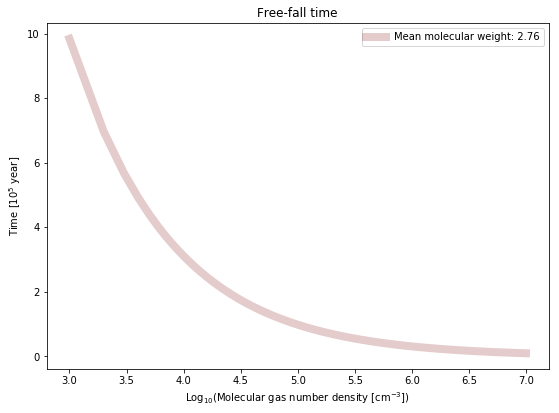

In [11]:
# physical constants
mean_mol_weight = 2.76  # mean molecular weight
mole            = 6.02214129e23
year_to_s       = 365.0 * 24.0 * 60.0 * 60.0

# initializing arrays
number_density = np.arange(1, 10001, 1) * 1e3
# output_array_cgs = np.arange(1, 10001, 1) * 0.0


# initializing plotting
fig = plt.figure(figsize=(9, 14))
plt.subplot(2, 1, 1)
# plt.axis([4.0, 6.5, 0.01, 0.2])

# evaluate free-fall time
density = number_density * mean_mol_weight / mole
output_array_cgs = freefall_cgs(density) / ( year_to_s * 1e5)


plt.plot(np.log10( number_density ), output_array_cgs, \
         color = (0.5, 0.0, 0.0, 0.2),
         linewidth=8, label = 'Mean molecular weight: 2.76')

plt.title('Free-fall time')
plt.xlabel('Log$_{10}($Molecular gas number density [cm$^{-3}$])')
plt.ylabel('Time [10$^{5}$ year]')
plt.legend(loc=1)

### Plot Jeans length as a function of cloud particle number density

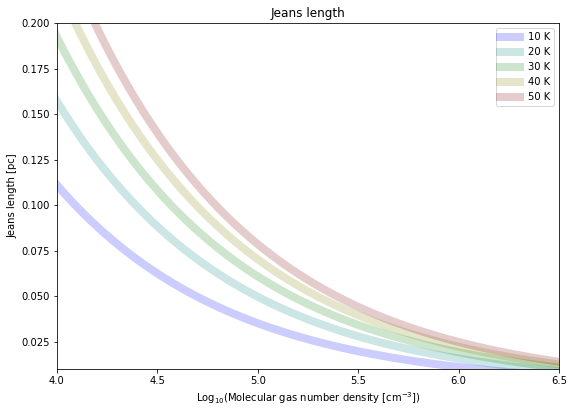

In [12]:
# physical constants
mean_mol_weight = 2.76  # mean molecular weight
mole            =  6.02214129e23
parsec_to_cm    = 3.08567758e18

# initializing arrays
number_density = np.arange(1, 10001, 1) * 1e3
output_array_cgs = np.arange(1, 10001, 1) * 0.0


# initializing plotting
fig = plt.figure(figsize=(9, 14))
plt.subplot(2, 1, 1)
plt.axis([4.0, 6.5, 0.01, 0.2])

# initial conditions
particlemass = mean_mol_weight / mole
density = number_density * mean_mol_weight / mole


temperature = 10.0  
output_array_cgs = Jeanslength_cgs(density, temperature, particlemass) / parsec_to_cm

plt.plot(np.log10( number_density ), output_array_cgs, \
         color = (0, 0, 1.0, 0.2),
         linewidth=8, label = '10 K')

temperature = 20.0  
output_array_cgs = Jeanslength_cgs(density, temperature, particlemass) / parsec_to_cm

plt.plot(np.log10( number_density ), output_array_cgs, \
         color = (0, 0.5, 0.5, 0.2),
         linewidth=8, label = '20 K')

temperature = 30.0  
output_array_cgs = Jeanslength_cgs(density, temperature, particlemass) / parsec_to_cm

plt.plot(np.log10( number_density ), output_array_cgs, \
         color = (0, 0.5, 0.0, 0.2),
         linewidth=8, label = '30 K')

temperature = 40.0  
output_array_cgs = Jeanslength_cgs(density, temperature, particlemass) / parsec_to_cm

plt.plot(np.log10( number_density ), output_array_cgs, \
         color = (0.5, 0.5, 0.0, 0.2),
         linewidth=8, label = '40 K')

temperature = 50.0  
output_array_cgs = Jeanslength_cgs(density, temperature, particlemass) / parsec_to_cm

plt.plot(np.log10( number_density ), output_array_cgs, \
         color = (0.5, 0.0, 0.0, 0.2),
         linewidth=8, label = '50 K')

plt.title('Jeans length')
plt.xlabel('Log$_{10}($Molecular gas number density [cm$^{-3}$])')
plt.ylabel('Jeans length [pc]')
plt.legend(loc=1)

### Plot Jeans mass as a function of cloud particle number density

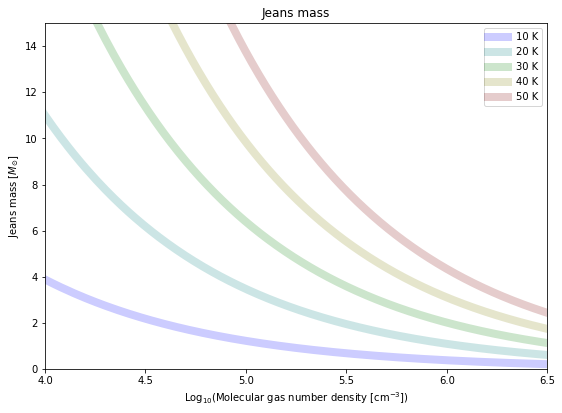

In [13]:
# physical constants
mean_mol_weight = 2.76  # mean molecular weight
mole            =  6.02214129e23
parsec_to_cm    = 3.08567758e18
solar_mass_cgs  = 1.9891e33

# initializing arrays
number_density = np.arange(1, 10001, 1) * 1e3
output_array_cgs = np.arange(1, 10001, 1) * 0.0


# initializing plotting
fig = plt.figure(figsize=(9, 14))
plt.subplot(2, 1, 1)
plt.axis([4.0, 6.5, 0.01, 15])

# initial conditions
particlemass = mean_mol_weight / mole
density = number_density * mean_mol_weight / mole

temperature = 10.0  
output_array_cgs = Jeansmass_cgs(density, temperature, particlemass) / solar_mass_cgs

line10K = plt.plot(np.log10( number_density ), output_array_cgs, \
          color = (0, 0, 1.0, 0.2), \
          linewidth=8, \
          label = '10 K')

temperature = 20.0  
output_array_cgs = Jeansmass_cgs(density, temperature, particlemass) / solar_mass_cgs

line20K = plt.plot(np.log10( number_density ), output_array_cgs, \
          color = (0, 0.5, 0.5, 0.2), \
          linewidth=8, \
          label = '20 K')

temperature = 30.0  
output_array_cgs = Jeansmass_cgs(density, temperature, particlemass) / solar_mass_cgs

line30K = plt.plot(np.log10( number_density ), output_array_cgs, \
          color = (0, 0.5, 0.0, 0.2), \
          linewidth=8, \
          label = '30 K')

temperature = 40.0  
output_array_cgs = Jeansmass_cgs(density, temperature, particlemass) / solar_mass_cgs

line40K = plt.plot(np.log10( number_density ), output_array_cgs, \
          color = (0.5, 0.5, 0.0, 0.2), \
          linewidth = 8, \
          label = '40 K')

temperature = 50.0  
output_array_cgs = Jeansmass_cgs(density, temperature, particlemass) / solar_mass_cgs

line50K = plt.plot(np.log10( number_density ), output_array_cgs, \
          color = (0.5, 0.0, 0.0, 0.2), \
          linewidth = 8, \
          label = '50 K')

plt.title('Jeans mass')
plt.xlabel('Log$_{10}$(Molecular gas number density [cm$^{-3}$])')
plt.ylabel('Jeans mass [$M_{\odot}$]')
plt.legend(loc=1)